In [1]:
#A1
class Polygon:
    def __init__(self,sides):
        self.sides=sides
    def display_sides(self):
        print(f"This polygon has {self.sides} sides")
    def find_area(self):
        raise NotImplementedError("Subclasses must implement this method.")

class Triangle(Polygon):
    def __init__(self):
        super().__init__(3)
        self.side1=float(input("Enter the length of side1: "))
        self.side2=float(input("Enter the length of side2: "))
        self.side3=float(input("Enter the length of side3: "))

    def find_area(self):
        s=(self.side1+self.side2+self.side3)/2
        area=(s*(s-self.side1)*(s-self.side2)*(s-self.side3))**0.5
        return area

triangle=Triangle()
triangle.display_sides()
area=triangle.find_area()
print(f" The area of the triangle is:{area}")

Enter the length of side1:  5
Enter the length of side2:  6
Enter the length of side3:  9


This polygon has 3 sides
 The area of the triangle is:14.142135623730951


In [2]:
#A3
import numpy as np
def get_student_info():
    name=input("Enter a student name: ")
    height=float(input("Enter a student height: "))
    class_num=int(input("Enter student class:"))
    return name,height,class_num

num_students=int(input("Enter the number of students: "))
dtypes=[('name','U20'),('height',float),('class',int)]
students_array=np.empty(num_students,dtype=dtypes)

for i in range(num_students):
    print(f"\n Enter information for student{i+1}:")
    students_array[i]=get_student_info()
print("\n Original Array:")
print(students_array)

sorted_students_array = np.sort(students_array,order='height')
print("\n Sorted Array based on height:")
print(sorted_students_array)

Enter the number of students:  2



 Enter information for student1:


Enter a student name:  alice
Enter a student height:  36
Enter student class: 9



 Enter information for student2:


Enter a student name:  smith
Enter a student height:  23
Enter student class: 12



 Original Array:
[('alice', 36.,  9) ('smith', 23., 12)]

 Sorted Array based on height:
[('smith', 23., 12) ('alice', 36.,  9)]


In [3]:
#A4
import pandas as pd
df=pd.read_csv('churn.csv')
print(df)

     Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
0             1  8260-NGFNY    One  Month-to-month               No   
1             2  2359-QWQUL     39        One year              Yes   
2             3  6598/RFFVI      2        One year               No   
3             4  IXSTS-8780      6  Month-to-month              Yes   
4             5  2674/MIAHT   Four  Month-to-month              Yes   
..          ...         ...    ...             ...              ...   
252         253  9318-NKNFC    One  Month-to-month              Yes   
253         254  9067-SQTNS     44        One year               No   
254         255  9067-SQTNS     44        One year               No   
255         256  9067-SQTNS     44        One year               No   
256         257  9067-SQTNS     44        One year               No   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0                 Mailed check           25.20         25.20  Female   
1  

In [4]:
#(i)
duplicate_count=df.duplicated().sum()
print(f"Number of Duplicate Records:{duplicate_count}")

Number of Duplicate Records:0


In [5]:
#(ii)
duplicate_customer_id=df['customerID'].duplicated().sum()
print(f"Number of Duplicate Records based on 'customerID' column:{duplicate_customer_id}")

Number of Duplicate Records based on 'customerID' column:7


In [6]:
#(iii)
missing_values_per_column=df.isnull().sum()
print(f"Number of missing values in each column:{missing_values_per_column}")

Number of missing values in each column:Unnamed: 0           0
customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64


In [7]:
#(iv)
missing_values_TotalCharges=df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'Total Charges':{missing_values_TotalCharges}")

Number of missing values in 'Total Charges':15


In [8]:
#(v)
average_monthly_charge=df['MonthlyCharges'].mean()
print(f"Average MonthlyCharges:{average_monthly_charge}")

Average MonthlyCharges:62.47348178137652


In [9]:
#(vi)
filtered_records=df[df['Dependents']=="1@#"]
print(f"Records with 'Dependents' equal to '1@#':{filtered_records}")

#Alter
filtered_records1=df.query('Dependents =="1@#" ')
print(f"Records with 'Dependents' equal to '1@#':{filtered_records1}")

Records with 'Dependents' equal to '1@#':     Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
89           90  1754-GKYPY     22  Month-to-month              Yes   
125         126  9108-EQPNQ     10        Two year               No   
174         175  2640-PMGFL     27  Month-to-month              Yes   
220         221  8854-CCVSQ     18  Month-to-month              Yes   
234         235  6876-ADESB    One  Month-to-month               No   
238         239  1972-XMUWV     65        Two year              Yes   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
89   Bank transfer (automatic)           89.75       1938.90    Male   
125    Credit card (automatic)           26.10        225.55  Female   
174           Electronic check           79.50       2180.55    Male   
220           Electronic check           80.65       1451.90    Male   
234           Electronic check           48.95         48.95    Male   
238    Credit card (automatic

In [10]:
#(vii)
new_df=df.fillna(df.median(numeric_only=True))
new_df=new_df.fillna(df.mode().iloc[0])
print(new_df.isnull().sum())

Unnamed: 0          0
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64


In [11]:
print("The original column is:")
print(new_df['MonthlyCharges'])
x=new_df['MonthlyCharges']
print("The replaced column is :")
x.replace(25.20,25)

The original column is:
0       25.20
1      104.70
2       19.30
3       90.10
4       80.30
        ...  
252     18.85
253     20.60
254     20.60
255     20.60
256     20.60
Name: MonthlyCharges, Length: 257, dtype: float64
The replaced column is :


0       25.00
1      104.70
2       19.30
3       90.10
4       80.30
        ...  
252     18.85
253     20.60
254     20.60
255     20.60
256     20.60
Name: MonthlyCharges, Length: 257, dtype: float64

In [12]:
#A2 (a)
import re
text="xyz@gmail.com and 999@99ad.com and abc_987@vvce.ac.in are the mail id's,(897)-012-3456 ext.23 and 897-0123456x23 are numbers."
emailRegex=re.compile('[a-zA_Z0-9._]+@[a-zA-Z0-9,-]+[.][a-zA-Z]{2,4}')
L=emailRegex.findall(text)
for email in L:
    print(email)

xyz@gmail.com
999@99ad.com
abc_987@vvce.ac


In [13]:
#A2 (b)
import re
p=input("Input your password:")
if len(p)>5 and len(p)<17 and re.search('[a-z]',p) and re.search('[A-Z]',p) and re.search('[0-9]',p) and re.search('[$#@_]',p):
    print("Valid password")
else:
    print("Invalid Password")

Input your password: Apple@1632


Valid password


In [14]:
#C1
class Employee:
    count = 0 
    def __init__(self):
        self.name = None
        self.place = None
        self.department = None
        Employee.count += 1
        self.eid = 'Emp' + str(Employee.count)

    def update(self):
        self.name = input("Enter name: ")
        self.place = input("Enter place: ")
        self.department = input("Enter dept: ")

    def display(self):
        print("Employee ID:", self.eid)
        print("Employee Name:", self.name)
        print("Employee Place:", self.place)
        print("Employee Dept:", self.department)
        print("-" * 30)

n = int(input("Enter total number of Employees: "))
employees = [] 
for i in range(n):
    emp = Employee()
    emp.update()
    employees.append(emp)
print("\nEmployee Details: \n")
for emp in employees:
    emp.display()

Enter total number of Employees:  2
Enter name:  jack
Enter place:  mys
Enter dept:  cs
Enter name:  rose
Enter place:  beng
Enter dept:  market



Employee Details: 

Employee ID: Emp1
Employee Name: jack
Employee Place: mys
Employee Dept: cs
------------------------------
Employee ID: Emp2
Employee Name: rose
Employee Place: beng
Employee Dept: market
------------------------------


In [15]:
#C2
import pandas as pd
import seaborn as sns
df = pd.read_csv('Automobile_data.csv', na_values=['?'])
print(df.head())
print(df.describe())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

<Axes: xlabel='num-of-doors', ylabel='horsepower'>

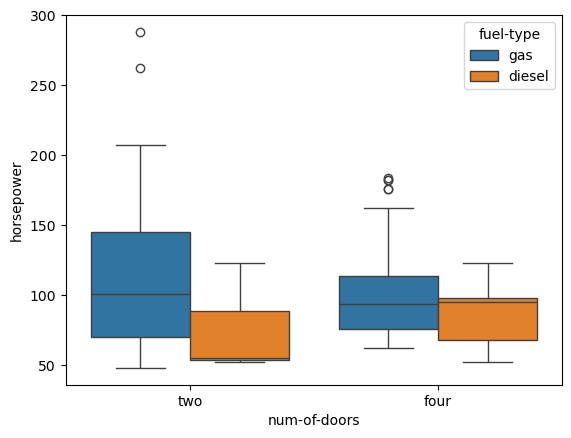

In [16]:
#(i)
sns.boxplot(x=df["num-of-doors"], y=df["horsepower"], hue=df["fuel-type"])

<Axes: xlabel='body-style', ylabel='horsepower'>

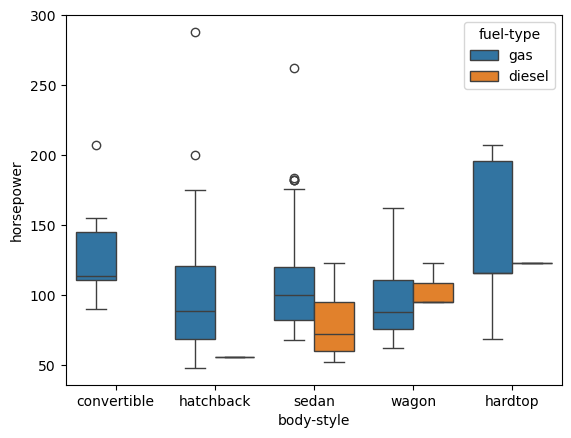

In [17]:
#(ii)
# Boxplot: Horsepower vs Body Style, grouped by Fuel Type
sns.boxplot(x=df["body-style"], y=df["horsepower"], hue=df["fuel-type"])

<Axes: xlabel='body-style', ylabel='count'>

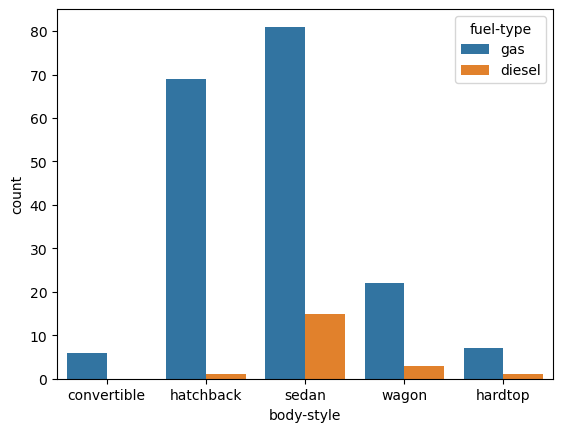

In [18]:
#(iii)
sns.countplot(x=df["body-style"], hue=df["fuel-type"])

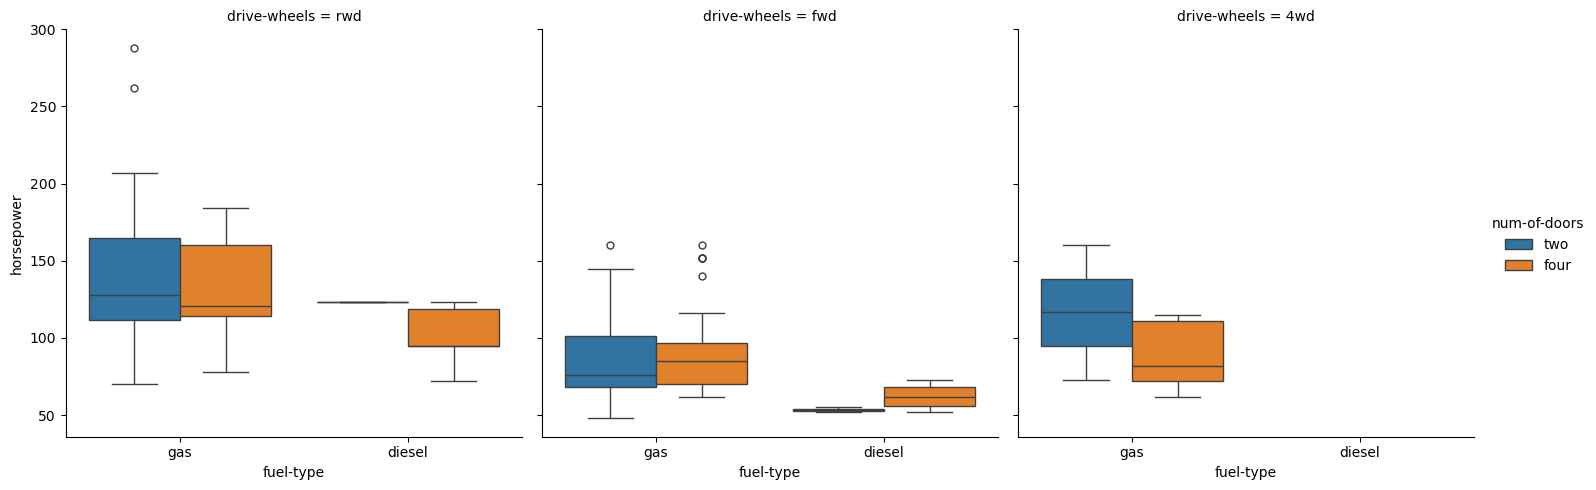

In [19]:
#(iv)
# Catplot: Horsepower by Fuel Type, Number of Doors, and Drive Wheels
sns.catplot(
    x="fuel-type",
    y="horsepower",
    hue="num-of-doors",
    col="drive-wheels",
    data=df,
    kind="box"
)

<Axes: xlabel='fuel-type', ylabel='horsepower'>

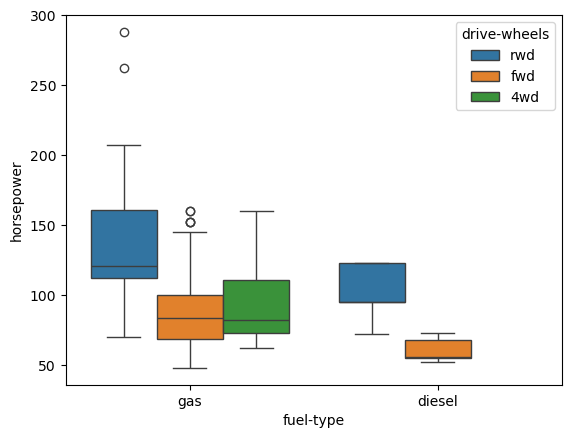

In [20]:
#(v)
# Boxplot: Horsepower vs Fuel Type, grouped by Drive Wheels
sns.boxplot(x=df['fuel-type'], y=df['horsepower'], hue=df['drive-wheels'])

In [21]:
#B1
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Bridge.csv', index_col='Date', parse_dates=True)
df.columns = ['Total', 'East', 'West']
df.head()

,Total,East,West
Date,,,
2012-10-02 13:00:00,55,48,7
2012-10-02 14:00:00,130,75,55
2012-10-02 15:00:00,152,71,81
2012-10-02 16:00:00,278,111,167
2012-10-02 17:00:00,563,170,393


           Total       East       West
Date                                  
0     147.375000  76.208333  71.166667
1     155.400000  72.342857  83.057143
2     140.750000  71.000000  69.750000
3     135.875000  68.479167  67.395833
4     109.255319  54.702128  54.553191
5      83.583333  45.000000  38.583333
6      89.250000  49.625000  39.625000


<Axes: >

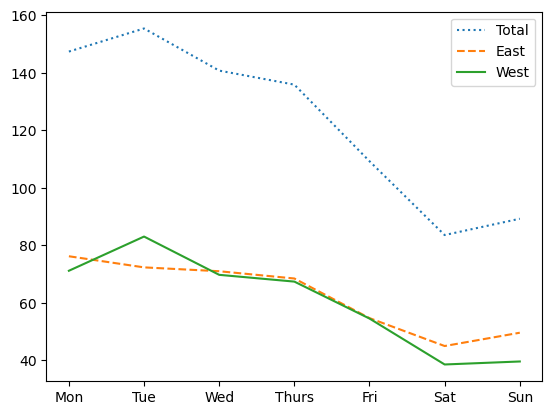

In [22]:
#B1 (i)
by_weekday=df.groupby(df.index.dayofweek).mean()
print(by_weekday)
by_weekday.index=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

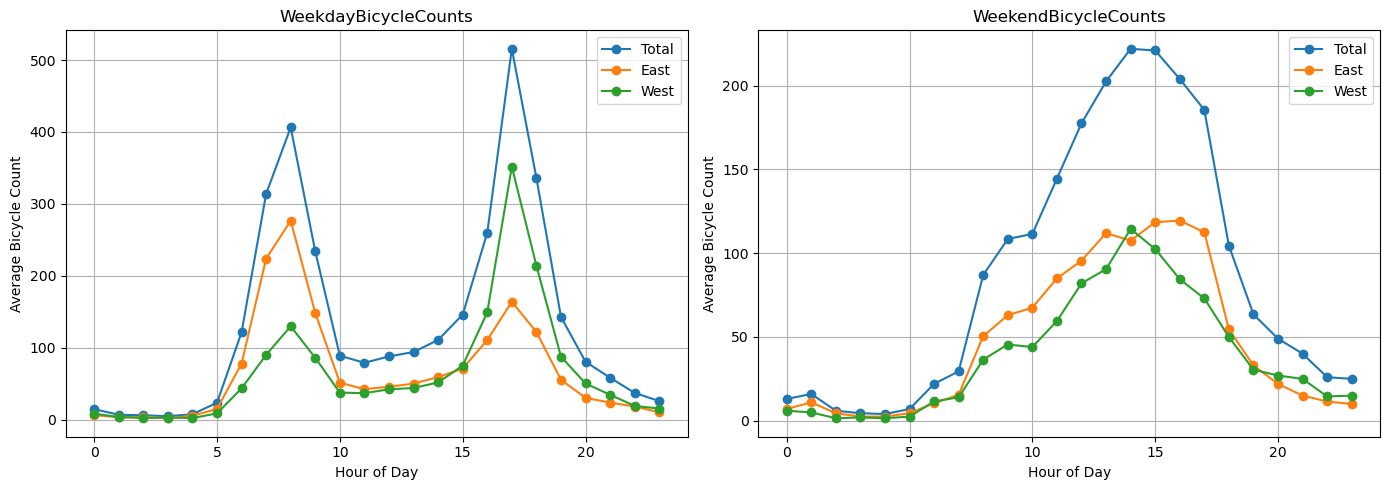

In [23]:
#B1 (ii)
import numpy as np
import matplotlib.pyplot as plt

weekend_array=np.where(df.index.dayofweek<5,'Weekday','Weekend')
by_time=df.groupby([weekend_array,df.index.hour]).mean()
fig,ax=plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],title='WeekdayBicycleCounts',marker='o')
by_time.loc['Weekend'].plot(ax=ax[1],title='WeekendBicycleCounts',marker='o')

for a in ax:
    a.set_xlabel('Hour of Day')
    a.set_ylabel('Average Bicycle Count')
    a.grid(True)
plt.tight_layout()
plt.show()

In [24]:
#B2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('births.csv')
df.head()
print(df.columns)

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')


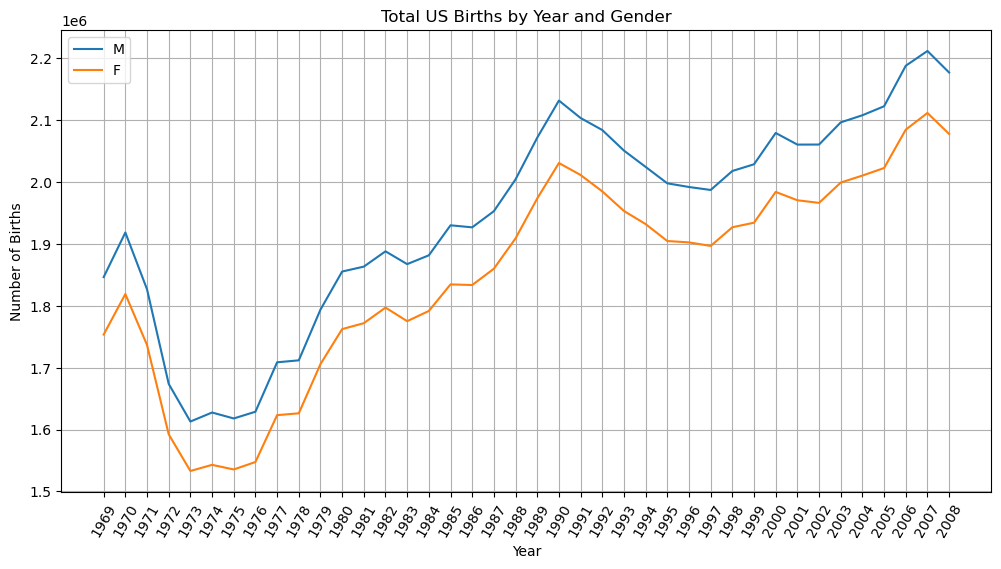

In [25]:
#B2 (i)
total=df.groupby(['year','gender'])['births'].sum()
plt.figure(figsize=(12,6))
for gender in['M','F']:
    plt.plot(total.loc[:,gender].index,total.loc[:,gender].values,label=gender)
years=total.index.get_level_values('year').unique()
plt.xticks(ticks=years,rotation=60)
plt.title('Total US Births by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#B2 (ii)
# Filter valid dates(Remove Invalid Dates)
df = df[(df['month'] >= 1) & (df['month'] <= 12) & (df['day'] >= 1) & (df['day'] <= 31)]

# Convert to datetime and get day of week
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
df['decade']=(df['year']//10)*10 #data.loc[:,'decade']=(data['year']//10)*10

# Group by decade and day of week to calculate average births
avg_daily = df.groupby(['decade', 'day_of_week'])['births'].mean().unstack()
print(avg_daily)

day_of_week       Friday       Monday     Saturday       Sunday     Thursday  \
decade                                                                         
1960         5107.884615  5063.826923  4651.057692  4342.346154  4978.288462   
1970         4782.095785  4689.097701  4207.784483  3979.278736  4696.923372   
1980         5393.087234  5276.907249  4483.901064  4308.120469  5333.485106   

day_of_week      Tuesday    Wednesday  
decade                                 
1960         5286.096154  5074.622642  
1970         4885.252399  4750.376200  
1980         5503.842553  5367.642553  


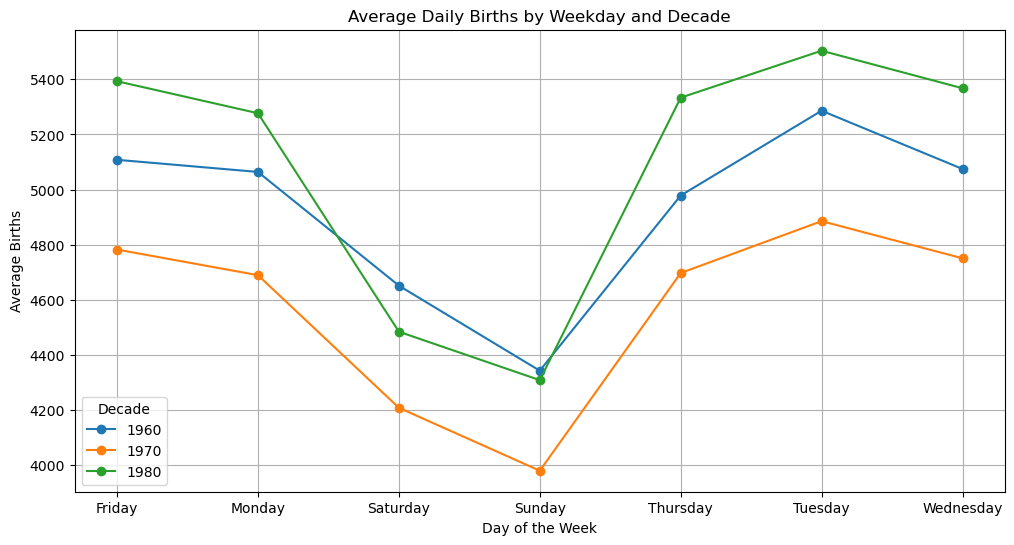

In [27]:
# Plot the average births by day of the week for each decade
avg_daily.T.plot(figsize=(12, 6), marker='o')

# Add labels and title
plt.title("Average Daily Births by Weekday and Decade")
plt.xlabel("Day of the Week")
plt.ylabel("Average Births")
plt.legend(title="Decade")
plt.grid(True)
plt.show()

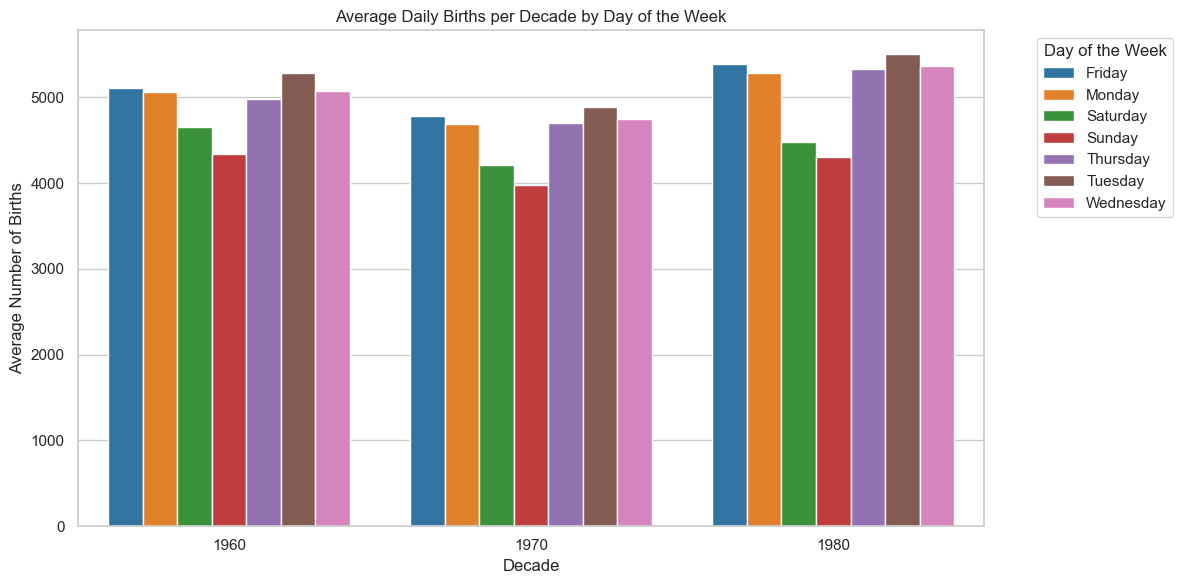

In [28]:
import seaborn as sns
sns.set(style="whitegrid")
avg_daily_plot = avg_daily.reset_index().melt(id_vars='decade', var_name='day_of_week', value_name='avg_births')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_daily_plot,
    x='decade',
    y='avg_births',
    hue='day_of_week',
    palette='tab10'
)

plt.title('Average Daily Births per Decade by Day of the Week')
plt.xlabel('Decade')
plt.ylabel('Average Number of Births')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()